# Influence of mass lumping, borehole representation and near-field discretization on nodal fluxes under pressure bc

Authors: Thomas Nagel.

In [109]:
#HIDDEN
#! /opt/anaconda/bin/ python3.8
import math
from ogs6py.ogs import OGS
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #für Farb en
plt.rcParams.update({'font.size': 16})

# Set up models

We inject with constant pressure into an axisymmetric domain and use different spatial discretization (fine or coarse), mass lumping settings (on or off) and different borehole radius (0 or 10 cm). We check the resulting pressure profiles and mass fluxes.

In [110]:
#HIDDEN
model_r0=OGS(INPUT_FILE="simple_domain_r0.prj", PROJECT_FILE="zero_radius.prj")
model_r0c=OGS(INPUT_FILE="simple_domain_r0.prj", PROJECT_FILE="zero_radius_coarse.prj")
model_r01=OGS(INPUT_FILE="simple_domain_r0.prj", PROJECT_FILE="10cm_radius.prj")
model_list=[model_r0, model_r0c, model_r01]

In [111]:
#HIDDEN
model_r0.replace_text('zero_radius', xpath="./time_loop/output/prefix")
#
model_r0c.replace_text('zero_radius_coarse', xpath="./time_loop/output/prefix")
model_r0c.replace_text('simple_domain_r0_coarse.vtu', xpath="./mesh")
#
model_r01.replace_text('10cm_radius', xpath="./time_loop/output/prefix")
model_r01.replace_text('simple_domain_r01.vtu', xpath="./mesh")
model_r01.replace_text('simple_domain_r01.gml', xpath="./geometry")

for model in model_list:
    model.write_input()

model_r0cML=OGS(INPUT_FILE="zero_radius_coarse.prj", PROJECT_FILE="zero_radius_coarse_ML.prj")
model_r0cML.replace_text('true', xpath="./processes/process/mass_lumping")
model_r0cML.replace_text('zero_radius_coarse_ML', xpath="./time_loop/output/prefix")
model_r0cML.write_input()
model_list.append(model_r0cML)

# Run Models
Please enter your local OGS build-path at `PATH_OGS`. The output of OGS can be found in the `out`-file in the current directory.

In [112]:
#HIDDEN
PATH_OGS="/home/mok/ogs_release/bin/"

In [113]:
#HIDDEN
for model in model_list:
    model.run_model(path=PATH_OGS)

OGS finished with project file zero_radius.prj.
Execution took 0.9238777160644531 s
OGS finished with project file zero_radius_coarse.prj.
Execution took 0.48575401306152344 s
OGS finished with project file 10cm_radius.prj.
Execution took 0.8730261325836182 s
OGS finished with project file zero_radius_coarse_ML.prj.
Execution took 0.4696998596191406 s


# Postprocessing

In [114]:
#HIDDEN
import vtuIO
pvd_r0 = vtuIO.PVDIO("zero_radius.pvd", dim=2)
pvd_r0c = vtuIO.PVDIO("zero_radius_coarse.pvd", dim=2)
pvd_r0cML = vtuIO.PVDIO("zero_radius_coarse_ML.pvd", dim=2)
pvd_r01 = vtuIO.PVDIO("10cm_radius.pvd", dim=2)

In [115]:
#HIDDEN
line0=[(i,2.5,0) for i in np.linspace(start=0.0, stop=100.0, num=1000)]
line01=[(i,2.5,0) for i in np.linspace(start=0.1, stop=100.0, num=1000)]
r0 = np.array(line0)[:,0]

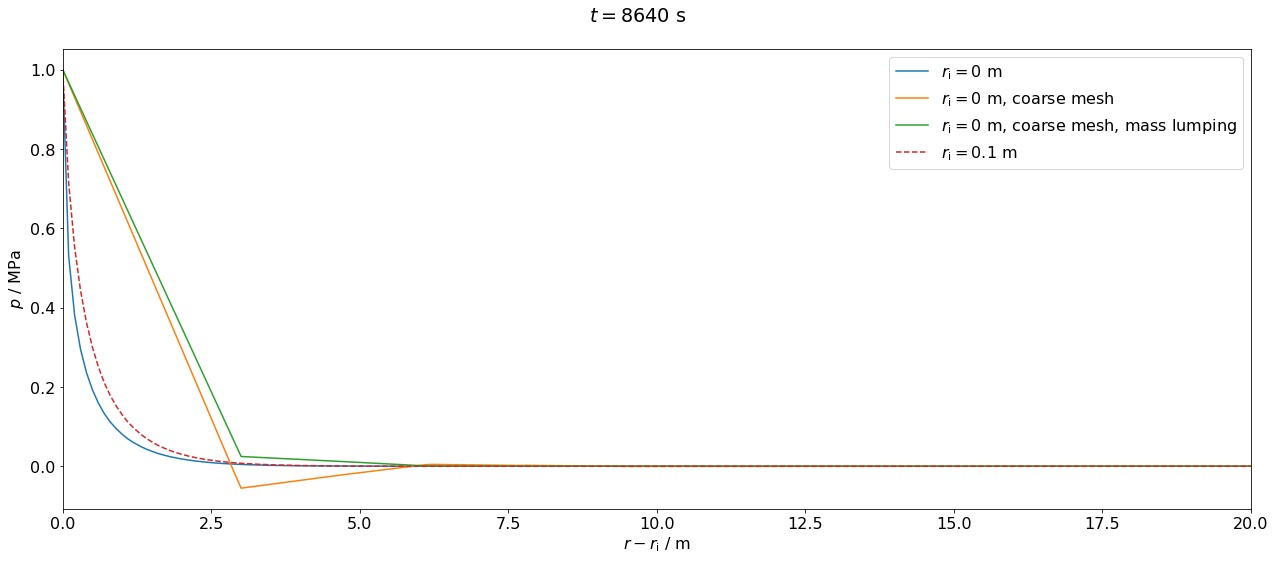

In [116]:
#HIDDEN
fig, ax = plt.subplots(figsize=(18,8))
#results_efp_line = pvd_efp.read_point_set_data(t,'pressure_interpolated', pointsetarray=line_x_efp,interpolation_method='nearest')

ax.plot(r0,pvd_r0.read_point_set_data(8640,'pressure', pointsetarray=line0,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0$ m')
ax.plot(r0,pvd_r0c.read_point_set_data(8640,'pressure', pointsetarray=line0,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0$ m, coarse mesh')
ax.plot(r0,pvd_r0cML.read_point_set_data(8640,'pressure', pointsetarray=line0,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0$ m, coarse mesh, mass lumping')
ax.plot(r0,pvd_r01.read_point_set_data(8640,'pressure', pointsetarray=line01,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0.1$ m', ls='--')
ax.set_xlabel('$r - r_\\mathrm{i}$ / m')
ax.set_ylabel('$p$ / MPa')
ax.set_xlim(0,20)
ax.legend()
fig.suptitle('$t = 8640$ s')
fig.tight_layout();

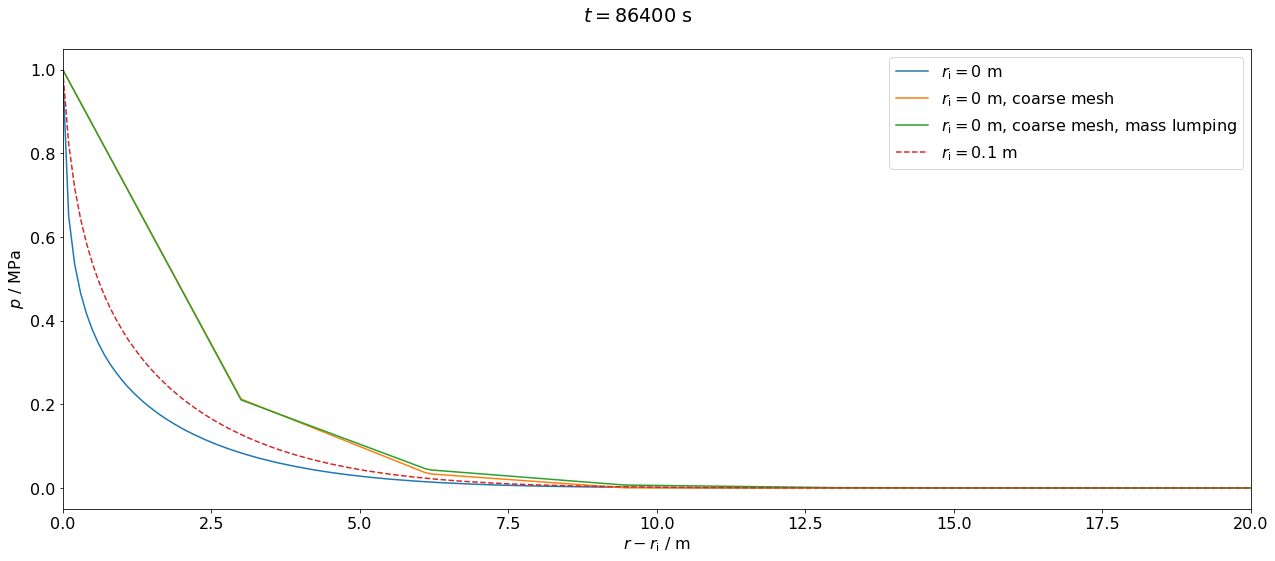

In [117]:
#HIDDEN
fig, ax = plt.subplots(figsize=(18,8))
#results_efp_line = pvd_efp.read_point_set_data(t,'pressure_interpolated', pointsetarray=line_x_efp,interpolation_method='nearest')

ax.plot(r0,pvd_r0.read_point_set_data(86400,'pressure', pointsetarray=line0,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0$ m')
ax.plot(r0,pvd_r0c.read_point_set_data(86400,'pressure', pointsetarray=line0,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0$ m, coarse mesh')
ax.plot(r0,pvd_r0cML.read_point_set_data(86400,'pressure', pointsetarray=line0,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0$ m, coarse mesh, mass lumping')
ax.plot(r0,pvd_r01.read_point_set_data(86400,'pressure', pointsetarray=line01,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0.1$ m', ls='--')
ax.set_xlabel('$r - r_\\mathrm{i}$ / m')
ax.set_ylabel('$p$ / MPa')
ax.set_xlim(0,20)
ax.legend()
fig.suptitle('$t = 86400$ s')
fig.tight_layout();

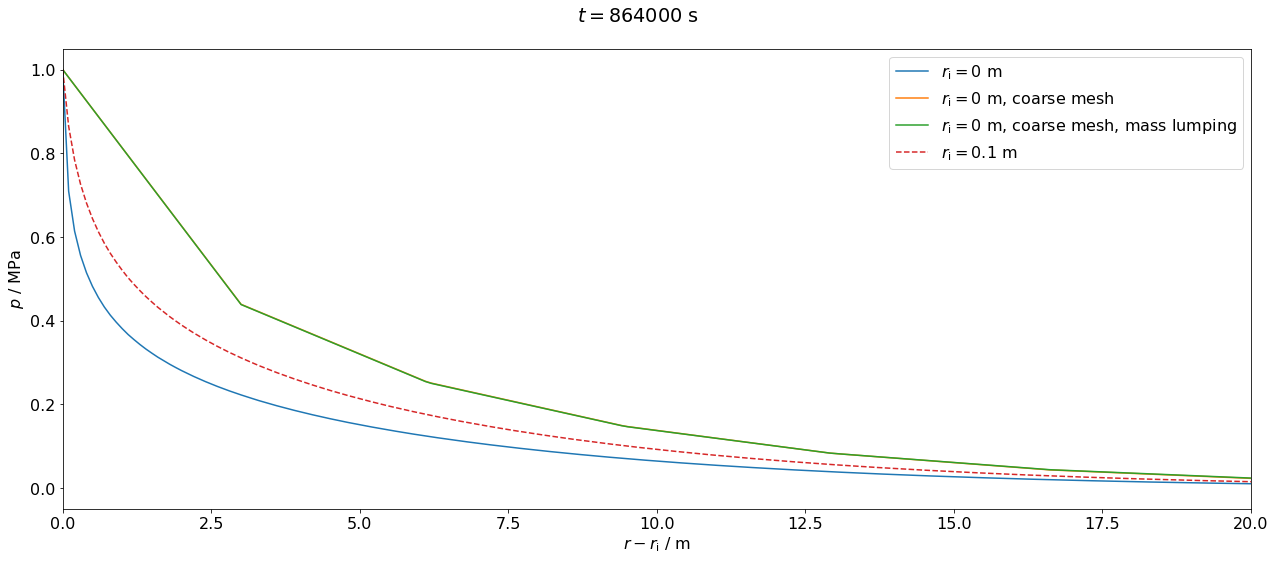

In [118]:
#HIDDEN
fig, ax = plt.subplots(figsize=(18,8))
#results_efp_line = pvd_efp.read_point_set_data(t,'pressure_interpolated', pointsetarray=line_x_efp,interpolation_method='nearest')

ax.plot(r0,pvd_r0.read_point_set_data(864000,'pressure', pointsetarray=line0,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0$ m')
ax.plot(r0,pvd_r0c.read_point_set_data(864000,'pressure', pointsetarray=line0,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0$ m, coarse mesh')
ax.plot(r0,pvd_r0cML.read_point_set_data(864000,'pressure', pointsetarray=line0,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0$ m, coarse mesh, mass lumping')
ax.plot(r0,pvd_r01.read_point_set_data(864000,'pressure', pointsetarray=line01,interpolation_method='linear')/1e6, label='$r_\\mathrm{i} = 0.1$ m', ls='--')
ax.set_xlabel('$r - r_\\mathrm{i}$ / m')
ax.set_ylabel('$p$ / MPa')
ax.set_xlim(0,20)
ax.legend()
fig.suptitle('$t = 864000$ s')
fig.tight_layout();

* mass lumping helps smoothing the oscillations when mesh is too coarse (or time step too fine)
* pressure profiles are merely shifted in the 1D case (not shown)
* pressure profiles are affected by borehole radius in the axisymmetric case. Accounting for $r_\text{i}$ gives lower gradients (reduces fluxes)

In [119]:
#HIDDEN
points = {"r0top": (0.0,5.0,0.0), 
          "r0bot": (0.0,0.0,0.0)}

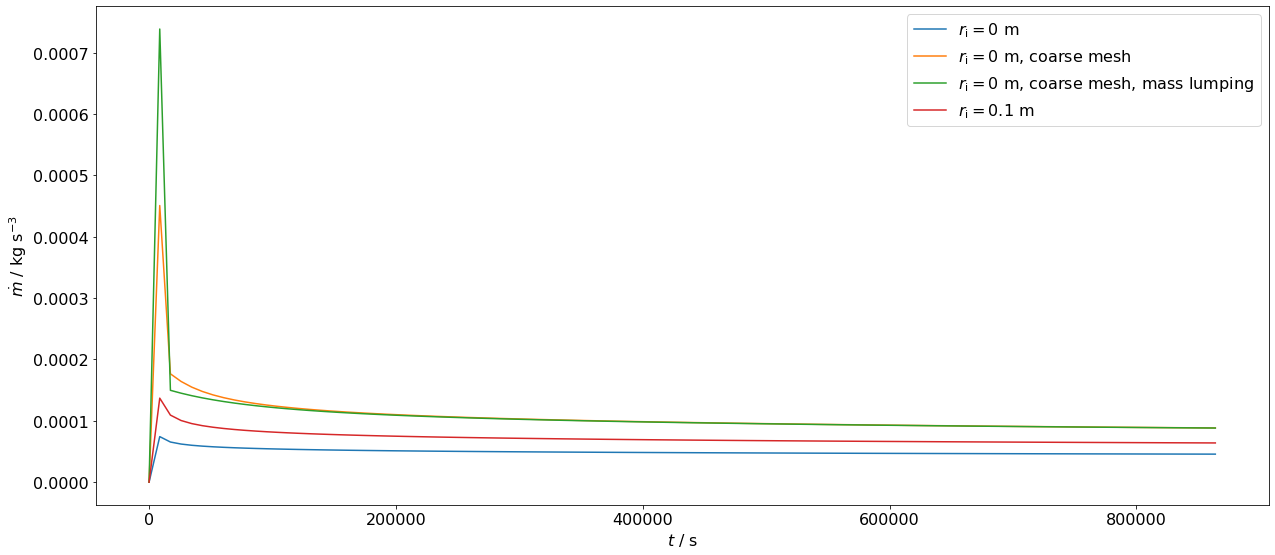

In [120]:
#HIDDEN
fig, ax = plt.subplots(figsize=(18,8))
#results_efp_line = pvd_efp.read_point_set_data(t,'pressure_interpolated', pointsetarray=line_x_efp,interpolation_method='nearest')

ax.plot(pvd_r0.timesteps,
        pvd_r0.read_time_series("HydraulicFlow",pts=points,interpolation_method='nearest')['r0top']+
        pvd_r0.read_time_series("HydraulicFlow",pts=points,interpolation_method='nearest')['r0bot'], label='$r_\\mathrm{i} = 0$ m')
ax.plot(pvd_r0c.timesteps,
        pvd_r0c.read_time_series("HydraulicFlow",pts=points,interpolation_method='nearest')['r0top']+
        pvd_r0c.read_time_series("HydraulicFlow",pts=points,interpolation_method='nearest')['r0bot'], label='$r_\\mathrm{i} = 0$ m, coarse mesh')
ax.plot(pvd_r0cML.timesteps,
        pvd_r0cML.read_time_series("HydraulicFlow",pts=points,interpolation_method='nearest')['r0top']+
        pvd_r0cML.read_time_series("HydraulicFlow",pts=points,interpolation_method='nearest')['r0bot'], label='$r_\\mathrm{i} = 0$ m, coarse mesh, mass lumping')
ax.plot(pvd_r01.timesteps,
        pvd_r01.read_time_series("HydraulicFlow",pts=points,interpolation_method='nearest')['r0top']+
        pvd_r01.read_time_series("HydraulicFlow",pts=points,interpolation_method='nearest')['r0bot'], label='$r_\\mathrm{i} = 0.1$ m')
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$\\dot{m}_\\mathrm{inj}$ / kg s$^{-3}$')
#ax.set_xlim(0,20)
ax.legend()
fig.tight_layout();

* Very strong impact of mesh and of mass lumping (when it is active, so during initial times with oscillatory solution)
* We observe that the peaks are an artefact due to an estimation of the injected volume (larger average gradients)
* Impact of borehole radius is clearly visible, too (larger area, larger flux)
* Linus' observations are consistent with discretization artifacts.